In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
Dataset_Path="/content/drive/MyDrive/archive/archive/animals"
classes=['dogs','panda','cats']
Images_Per_Class=100
Img_size=(64,64)
k_values=range(1,21)

def load_image():
    dataset=[]
    labels=[]
    for i, v in enumerate(classes):
        folder=os.path.join(Dataset_Path,v)
        file=sorted(os.listdir(folder))[:Images_Per_Class]

        for j in file:
            image_path=os.path.join(folder,j)
            image=cv2.imread(image_path)
            if image is None:
                continue
            else:
                image=cv2.resize(image,Img_size)
                dataset.append(image.flatten())
                labels.append(i)

    dataset=np.array(dataset)/255.0
    labels=np.array(labels)
    return dataset, labels


def l1_distance(x_train_images,x_test_image):
  distance=np.sum(np.abs(x_test_image-x_train_images),axis=1)
  return distance



In [9]:
from collections import Counter
def KNN(x_train_images,y_train,x_test_image,k):
  distance=l1_distance(x_train_images,x_test_image)
  k_index=np.argsort(distance)[:k]
  k_label=[y_train[i]for i in k_index]
  most_common_label = Counter(k_label).most_common(1)[0][0]
  return most_common_label


fold 1  accuracy: 0.3667
fold 2  accuracy: 0.4167
fold 3  accuracy: 0.3833
fold 4  accuracy: 0.4667
fold 5  accuracy: 0.3500
K:1
Average accuracy over 5 folds: 0.3967
fold 1  accuracy: 0.3667
fold 2  accuracy: 0.4167
fold 3  accuracy: 0.3833
fold 4  accuracy: 0.4667
fold 5  accuracy: 0.3500
K:2
Average accuracy over 5 folds: 0.3967
fold 1  accuracy: 0.4500
fold 2  accuracy: 0.4333
fold 3  accuracy: 0.3333
fold 4  accuracy: 0.4667
fold 5  accuracy: 0.3000
K:3
Average accuracy over 5 folds: 0.3967
fold 1  accuracy: 0.4833
fold 2  accuracy: 0.4667
fold 3  accuracy: 0.3167
fold 4  accuracy: 0.4500
fold 5  accuracy: 0.3333
K:4
Average accuracy over 5 folds: 0.4100
fold 1  accuracy: 0.5000
fold 2  accuracy: 0.4500
fold 3  accuracy: 0.3333
fold 4  accuracy: 0.4833
fold 5  accuracy: 0.3167
K:5
Average accuracy over 5 folds: 0.4167
fold 1  accuracy: 0.4667
fold 2  accuracy: 0.4500
fold 3  accuracy: 0.3333
fold 4  accuracy: 0.4333
fold 5  accuracy: 0.3000
K:6
Average accuracy over 5 folds: 0.396

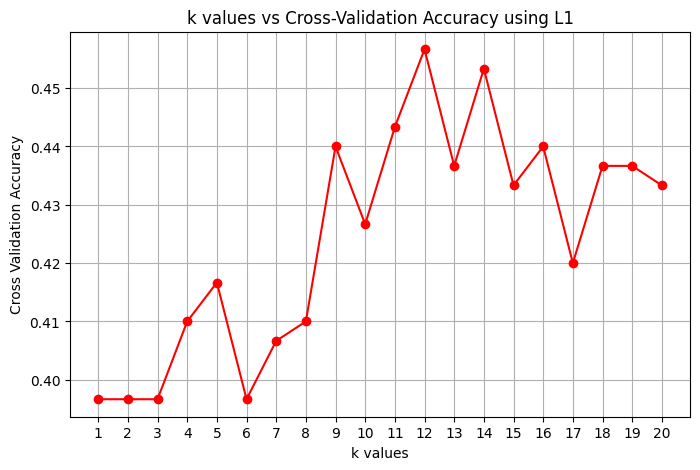

In [10]:
def cross_validation(x_data, y_data,k,folds=5):
    np.random.seed(42)
    n_samples=len(x_data)
    indices=np.arange(n_samples)
    np.random.shuffle(indices)
    fold_size=n_samples//folds
    accuracies=[]
    for fold in range(folds):
        start=fold*fold_size
        if fold==folds-1:
            end=n_samples
        else:
            end=start+fold_size

        test_indices=indices[start:end]
        train_indices=np.concatenate((indices[:start],indices[end:]))

        x_train=x_data[train_indices]
        y_train=y_data[train_indices]
        x_test=x_data[test_indices]
        y_test=y_data[test_indices]

        correct=0
        for i,test_img in enumerate(x_test):
            prediction=KNN(x_train,y_train,test_img,k)
            if prediction==y_test[i]:
                correct+=1

        accuracy=correct/len(test_indices)

        print(f"fold {fold+1}  accuracy: {accuracy:.4f}")
        accuracies.append(accuracy)

    average_accuracy=np.mean(accuracies)
    print(f"K:{k}")
    print(f"Average accuracy over {folds} folds: {average_accuracy:.4f}")
    return average_accuracy
x_data,y_data=load_image()
all_avg_accuracies=[]
for k in k_values:
    avg_acc=cross_validation(x_data,y_data,k,folds=5)
    all_avg_accuracies.append(avg_acc)

plt.figure(figsize=(8,5))
plt.plot(list(k_values), all_avg_accuracies, marker='o', linestyle='-', color='r')
plt.title("k values vs Cross-Validation Accuracy using L1")
plt.xlabel("k values")
plt.ylabel("Cross Validation Accuracy")
plt.xticks(list(k_values))
plt.grid(True)
plt.show()